## Datos acumulados

-> Función que calcule la energía acumulada hasta P95, P90

-> Obtener año típico, estaciones del año

-> Calcula P90 y P95 para eso

In [1]:
import os
import sys
from pathlib import Path
DIR_PROYECTO = Path(os.getcwd()).parent.resolve()
sys.path.append( str(DIR_PROYECTO) )

import lib
from scipy import stats
import numpy  as np
import matplotlib.pyplot as plt

from lib.energia import curva_de_potencia

temporadas = {
    "Mild": ["January","February", "March","April","May","June","October","November","December"],
    "Hot" : ["July", "August","September"],
}

In [2]:
def calcular_p(x,y,p):
    n = len(x)
    for i in range(n):
        integral = np.trapz(y[:i],x=x[:i])
        if integral > 1 - p:
            break
    return x[i]

In [3]:
obj_meses = {}
for mes in lib.MESES:
    obj_meses[mes] = lib.ObjMes(mes)

In [4]:
año_tipico  = []
for mes in lib.MESES:
    obj:lib.ObjMes = obj_meses[mes]
    año= obj.encontrar_mes_tipico(hasta_año=2018)
    ws = lib.cargar_datos(año=año, mes=mes)
    año_tipico.append(ws)
año_tipico = np.concatenate(año_tipico)

In [8]:
curva_de_potencia(np.array([6.55]))

array([773.361415])

3.163163163163163 6.546546546546547


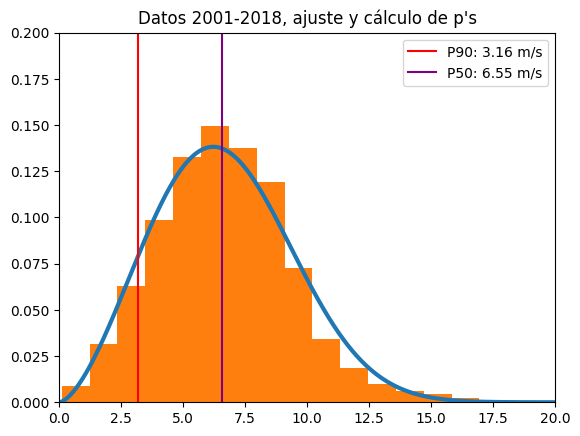

In [9]:
vel, prob_vel, k, l = lib.ajustar_weibull(año_tipico)
p90 = calcular_p(vel,prob_vel,0.90)
p50 = calcular_p(vel,prob_vel,0.50)

plt.plot(vel, prob_vel, lw=3)
plt.hist(año_tipico,bins=20,density=True)
plt.axvline(p90, c="red"   , label="P90: {:3.2f} m/s".format(p90))
plt.axvline(p50, c="purple", label="P50: {:3.2f} m/s".format(p50))
plt.legend()
plt.xlim(0,20)
plt.ylim(0,0.20)
plt.title("Datos 2001-2018, ajuste y cálculo de p's")

print(p90, p50)

3.5043504350435044


('P30:', 0.3717277785109573, '| Estimación:', 9263.002788694483)

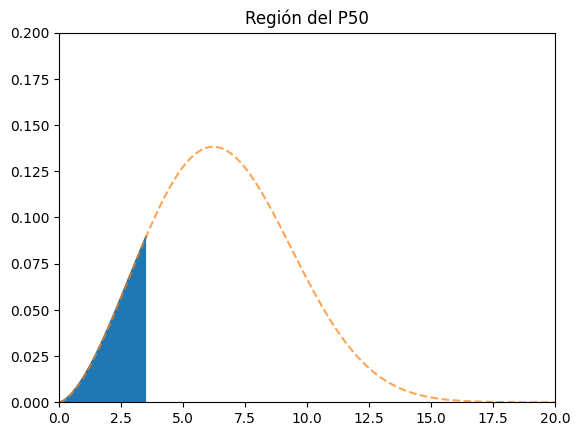

In [29]:
X   = np.linspace(0,20,10000)
fit = lib.fit_weibull(año_tipico)
Y   = lib.generar_curva(X, fit)


# -------------------------------------------
# Solo incluimos la integral hasta el p90
p90 = calcular_p(X,Y,0.87)
idx = X < p90
x, probabilidad = X[idx] , Y[idx]
# -------------------------------------------

plt.plot(x, probabilidad)
plt.plot(X,Y,ls="--", alpha=0.7)
plt.fill_between(x, probabilidad)  
plt.xlim(0,20)
plt.ylim(0,0.20)
plt.title("Región del P50")

potencia          = curva_de_potencia(x)
potencia_esperada = np.trapz(potencia*probabilidad,x=x)
energía_esperada  = len(año_tipico)*potencia_esperada / 1000

print(p90)
"P30:", energía_esperada , "| Estimación:", lib.calcular_energia(año_tipico)

In [ ]:
energia = lib.calcular_energia(ws_cortados)
print("P90:", energia / 1000, "MWh")

In [ ]:
if False:



x, y, k, lambda_o = lib.ajustar_weibull(año_tipico)
a = stats.exponweib.cdf(x,*(1,k,0,lambda_o))

plt.hist(año_tipico,bins=50, density=True)
plt.plot(x,y, lw=3)
plt.plot(x,a, lw=3)
plt.grid()


In [ ]:
def encontrar_acumulado(hasta_año):

    # FORMAMOS AÑO Y TEMPORADAS TÍPICAS

    año_tipico  = []
    hot_tipico  = []
    mild_tipico = []

    for mes in lib.MESES:
        obj:lib.ObjMes = obj_meses[mes]
        año= obj.encontrar_mes_tipico(hasta_año=hasta_año)
        ws = lib.cargar_datos(año=año, mes=mes)
        año_tipico.append(ws)

        if mes in temporadas["Hot"]:
            hot_tipico.append(ws)
        
        if mes in temporadas["Mild"]:
            mild_tipico.append(ws)


    # OBTENEMOS CURVAS DE WEIBULL
    # Representan la densidad de probabilidad de que el viento tenga esa velocidad.

    x, pdf_vel_año , _, _ = lib.ajustar_weibull(año_tipico)
    x, pdf_vel_hot , _, _ = lib.ajustar_weibull(hot_tipico)
    x, pdf_vel_mild, _, _ = lib.ajustar_weibull(mild_tipico)


    # OBTENEMOS LA DENSIDAD DE PROBAIBLIDAD DE LA ENERGÍA
    pdf_potencia_año = lib.curva_de_potencia()

    # INTEGRAMOS HASTA TENER P50 y P90



    ws_tipico = np.concatenate(ws_tipico)
